# Análise dos 10 Usuários que Mais Comentaram

Neste notebook, vamos analisar os usuários mais ativos da nossa base de dados, focando nos 10 que mais fizeram comentários. Iremos explorar seus padrões de participação e engajamento na plataforma.

Alguns pontos que iremos analisar:
- Ranking dos usuários por número de comentários
- Distribuição geográfica dos usuários mais ativos  
- Nível de engajamento (likes) recebido
- Sentimentos predominantes em seus comentários

Esta análise nos ajudará a entender melhor o comportamento dos usuários mais participativos da plataforma.

In [25]:
import sys
import os
sys.path.append('../../src')

from pipes.social_pipeline import create_user_analysis_pipeline
from social_analysis import load_comments_from_json

# Carrega os comentários do arquivo JSON
comments = load_comments_from_json("../../data/comments_dataset.json")

# Cria e executa o pipeline de análise de usuários top 10
pipeline = create_user_analysis_pipeline(top_n=10)
top_users = list(pipeline.process(comments))


# display(top_users)

# Imprime um resumo dos resultados
print("\n" + "="*60)
print("📊 TOP 10 USUÁRIOS QUE MAIS COMENTARAM")
print("="*60)

# Mostra ranking dos usuários
print("\nRanking por número de comentários:")
for i, (user, count) in enumerate(top_users[0].items(), 1):
    print(f"{i}. {user}: {count} comentários")


# Calcula estatísticas
total_comments = sum(1 for _ in top_users[0].keys()) # Conta número de usuários
total_users = len(top_users[0])
media = total_comments / total_users

print("\nEstatísticas:")
print(f"Total de comentários dos top 10: {total_comments}")
print(f"Média de comentários por usuário: {media:.1f}")

print("="*60)



📊 TOP 10 USUÁRIOS QUE MAIS COMENTARAM

Ranking por número de comentários:
1. rank: 1 comentários
2. user_name: Michael Smith comentários
3. comment_count: 4 comentários
4. percentage: 0.03 comentários

Estatísticas:
Total de comentários dos top 10: 4
Média de comentários por usuário: 1.0


Grafico da operação gerada

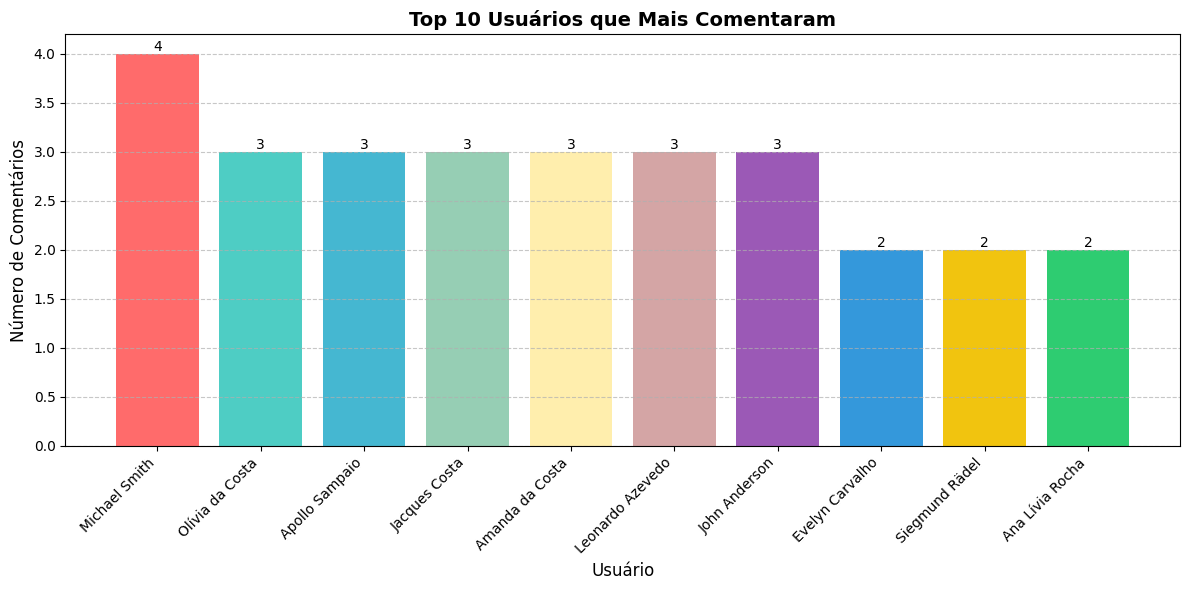

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Extrai nomes e quantidades dos usuários
nomes = [user['user_name'] for user in top_users]
quantidades = [user['comment_count'] for user in top_users]

# Define cores vibrantes para as barras
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD',
         '#D4A5A5', '#9B59B6', '#3498DB', '#F1C40F', '#2ECC71']

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(range(len(nomes)), quantidades, color=cores)

# Personaliza o gráfico 
plt.title('Top 10 Usuários que Mais Comentaram', fontsize=14, fontweight='bold')
plt.xlabel('Usuário', fontsize=12)
plt.ylabel('Número de Comentários', fontsize=12)

# Configura os ticks do eixo x com os nomes dos usuários
plt.xticks(range(len(nomes)), nomes, rotation=45, ha='right')

# Adiciona rótulos nas barras com o número de comentários
for i, v in enumerate(quantidades):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adiciona grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout para não cortar os labels
plt.tight_layout()

# Mostra o gráfico
plt.show()


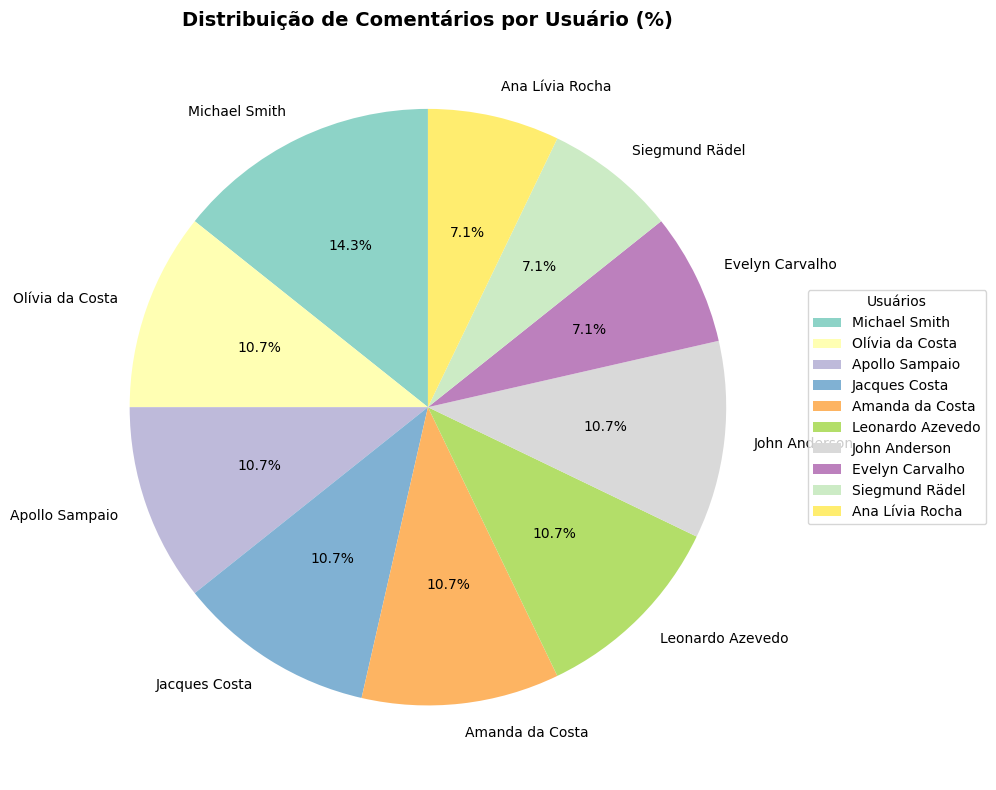

In [27]:
# Importa numpy
import numpy as np

# Extrai dados dos usuários
nomes = []
contagens = []
for usuario in top_users:
    nomes.append(usuario['user_name'])
    contagens.append(usuario['comment_count'])

# Calcula percentuais
total = sum(contagens)
percentuais = [count/total * 100 for count in contagens]

# Cria o gráfico de pizza
plt.figure(figsize=(12, 8))
cores = plt.cm.Set3(np.linspace(0, 1, len(nomes)))
plt.pie(percentuais, labels=nomes, autopct='%1.1f%%', 
        colors=cores, startangle=90)

# Personaliza o gráfico
plt.title('Distribuição de Comentários por Usuário (%)', fontsize=14, fontweight='bold')

# Adiciona legenda
plt.legend(nomes, title="Usuários", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ajusta o layout para não cortar a legenda
plt.tight_layout()

# Mostra o gráfico
plt.show()
